# VL 3 Interaktive Visualisierung

In [ ]:
# Install packages
#%pip uninstall plotnine -y
#%pip uninstall mizani -y

#%pip install plotly==5.22.0
#%pip install pandas gapminder 
#%pip install "plotnine==0.12.4" "mizani==0.9.3"
#%pip install plotly-express==0.4.1

In [ ]:
# Import packages and check version (prevent potential inconsistencies)
import plotnine
import mizani
print("plotnine:", plotnine.__version__)
print("mizani:", mizani.__version__)

plotnine: 0.12.4
mizani: 0.9.3


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from gapminder import gapminder
from plotnine import (
    ggplot, aes, geom_boxplot, labs, theme_minimal
)


# Daten

In [3]:
# Lade Gapminder-Daten
df = gapminder.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [4]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [5]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


# Teil 1 

Frage: 
- Erstelle einen Boxplot der Lebenserwartung im Jahr 2007 für Länder in Europa und Asien. Vergleiche Plotnine mit Plotly Express.
- Was fällt dir auf? Unterschiede? 


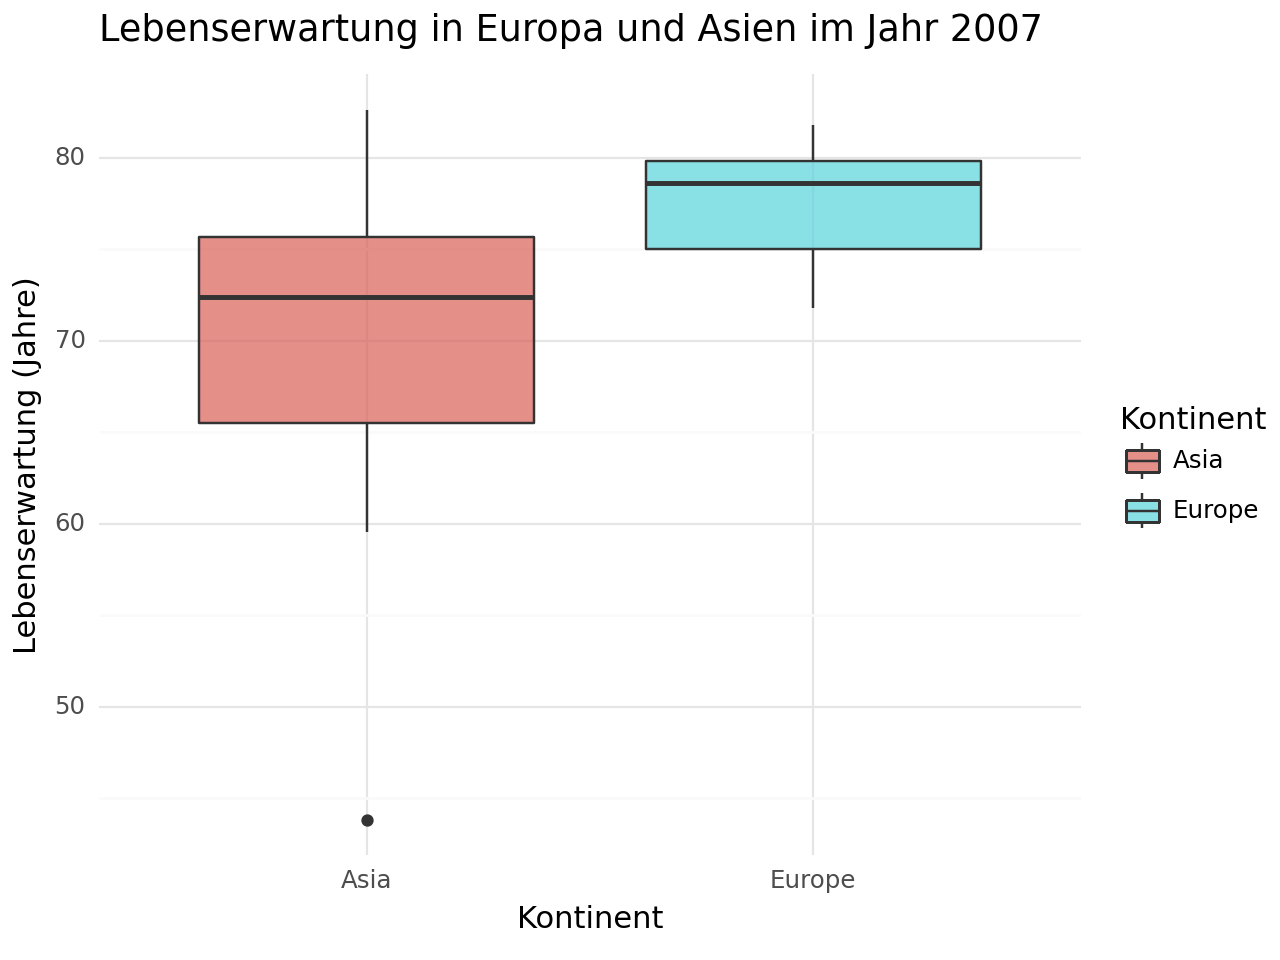

<Figure Size: (640 x 480)>

In [ ]:
# Daten filtern
df_2007 = df[df["year"] == 2007]
europe_asia_2007 = df_2007[df_2007["continent"].isin(["Europe", "Asia"])].copy()

# Boxplot
plot = (
    ggplot(europe_asia_2007, aes(x="continent", y="lifeExp", fill="continent"))
    + geom_boxplot(alpha=0.7)
    + labs(
        title="Lebenserwartung in Europa und Asien im Jahr 2007",
        y="Lebenserwartung (Jahre)",
        x="Kontinent",
        fill="Kontinent"
    )
    + theme_minimal()
)

plot


In [12]:
df_2007 = df[df["year"] == 2007]
fig = px.box(
    df_2007[df_2007["continent"].isin(["Europe", "Asia"])],
    x="continent",
    y="lifeExp",
    title="Lebenserwartung in Europa und Asien im Jahr 2007",
    labels={"lifeExp": "Lebenserwartung (Jahre)", "continent": "Kontinent"}
)

fig.show()

📊 Interpretation: 

# Teil 2 

- Erstelle in plotly express einen Button um die Darstellung von Boxplot auf Violinplot zu ändern. 
- Wie kann man das gleiche mit der grammar of graphics in plotnine/ggplot machen?


In [13]:
import pandas as pd
import plotly.graph_objects as go
from plotly.data import gapminder

# ---------------------------------
# Daten laden & filtern (1952)
# ---------------------------------
df = gapminder()
gapminder_1952 = df[df["year"] == 1952]

# ---------------------------------
# Figure mit beiden Chart-Typen
# (Box + Violin, abwechselnd sichtbar)
# ---------------------------------
fig = go.Figure()

# Boxplot
fig.add_trace(
    go.Box(
        x=gapminder_1952["continent"],
        y=gapminder_1952["lifeExp"],
        name="Boxplot",
        visible=True
    )
)

# Violinplot
fig.add_trace(
    go.Violin(
        x=gapminder_1952["continent"],
        y=gapminder_1952["lifeExp"],
        name="Violinplot",
        visible=False,
        box_visible=True,
        meanline_visible=True
    )
)

# ---------------------------------
# Layout & Achsentitel
# ---------------------------------
fig.update_layout(
    title="Lebenserwartung nach Kontinent (1952)",
    xaxis_title="Kontinent",
    yaxis_title="Lebenserwartung (Jahre)",
)

# ---------------------------------
# Buttons zum Umschalten
# ---------------------------------
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            x=0.5,
            y=1.15,
            xanchor="center",
            yanchor="top",
            buttons=[
                dict(
                    label="Boxplot",
                    method="update",
                    args=[
                        {"visible": [True, False]},  # Trace 0 an, Trace 1 aus
                        {"title": "Lebenserwartung nach Kontinent (1952) – Boxplot"}
                    ]
                ),
                dict(
                    label="Violinplot",
                    method="update",
                    args=[
                        {"visible": [False, True]},  # Trace 0 aus, Trace 1 an
                        {"title": "Lebenserwartung nach Kontinent (1952) – Violinplot"}
                    ]
                )
            ]
        )
    ]
)

fig.show()


📊 Interpretation: 

# Teil 3 

- Erstelle mit Plotly Express einen Scatterplot der Lebenserwartung gegen das BIP pro Kopf für das Jahr 1952. Die Kontinente sollen als Farben verwendet werden. Nutze eine logarithmische Skalierung für die x-Achse.
- Vergleiche erneut Plotly Express mit Plotnine. Was fällt dir auf? Unterschiede?

In [14]:
# Daten filtern für das Jahr 1952
gapminder_1952 = df[df["year"] == 1952]

# Scatterplot erstellen
scatter_1952_p9 = (
    ggplot(gapminder_1952, aes(x="gdpPercap", y="lifeExp", color="continent")) +
    geom_point(size=3, alpha=0.8) +
    scale_x_log10() +
    labs(
        title="Lebenserwartung vs. BIP/Kopf (1952)",
        x="BIP/Kopf (log-Skala)",
        y="Lebenserwartung (Jahre)",
        color="Kontinent"
    ) +
    theme_minimal()
)

# Plot anzeigen
scatter_1952_p9


NameError: name 'geom_point' is not defined

In [ ]:
# Daten filtern für das Jahr 1952
gapminder_1952 = df[df["year"] == 1952]

# Scatterplot erstellen
scatter_1952_plotly = px.scatter(
    gapminder_1952,
    x="gdpPercap",
    y="lifeExp",
    color="continent",
    hover_name="country",
    size_max=10,
    log_x=True,
        labels={
        "lifeExp": "Lebenserwartung (Jahre)",
        "gdpPercap": "BIP / Kopf"
    },
    title="Lebenserwartung vs. GDP per Capita (1952)"
)

# Plot anzeigen
scatter_1952_plotly

📊 Interpretation: 

# Teil 3

Frage: 

- Wie können wir die Entwicklung der Lebenserwartung nach Kontinenten interaktiv vergleichen?
- Erstelle eine Chart der Entwicklng der Lebenserwartung für Länder in Plotly. Mit einem Filter sollen die Daten auf einen Kontinente eingeschränkt werden können.

Ziel: Dropdown-Menüs und Sichtbarkeit von Traces verstehen, um mehrere Linienplots in einer Figur zu steuern.

In [15]:
continents = df["continent"].unique()

fig = go.Figure()
continent_trace_indices = []  # Liste von Listen mit Trace-Indizes
current_index = 0

# Für jeden Kontinent eine eigene Gruppe von Traces anlegen
for cont in continents:
    df_c = df[df["continent"] == cont]
    fig_c = px.line(
        df_c,
        x="year",
        y="lifeExp",
        color="country",
        markers=True,
        title=f"Lebenserwartung in {cont}"
    )

    indices_for_this_cont = []

    for tr in fig_c.data:
        fig.add_trace(tr)
        indices_for_this_cont.append(current_index)
        current_index += 1

    continent_trace_indices.append(indices_for_this_cont)

# Initial: alle Traces unsichtbar setzen
for tr in fig.data:
    tr.visible = False

# Standardmäßig den ersten Kontinent sichtbar machen
for idx in continent_trace_indices[0]:
    fig.data[idx].visible = True

buttons = []
for i, cont in enumerate(continents):
    visible = [False] * len(fig.data)
    for idx in continent_trace_indices[i]:
        visible[idx] = True

    buttons.append(
        dict(
            label=cont,
            method="update",
            args=[
                {"visible": visible},
                {"title": f"Lebenserwartung nach Ländern – {cont}"},
            ]
        )
    )

fig.update_layout(
    title=f"Lebenserwartung nach Ländern – {continents[0]}",
    xaxis_title="Jahr",
    yaxis_title="Lebenserwartung",
    updatemenus=[
        dict(
            type="dropdown",
            buttons=buttons,
            x=1.15,
            y=1.0
        )
    ]
)

fig.show()

📊 Interpretation: 
- Das Dropdown ermöglicht es, die Linienplots pro Kontinent gezielt zu vergleichen, ohne dass der Plot überladen wirkt.
- Durch das Ein-/Ausblenden von Traces bleibt die visuelle Struktur (Achsen, Skalen) konstant, nur der Inhalt wechselt.
- Didaktisch ist wichtig: Interaktivität ersetzt nicht die Datenbasis – sie hilft nur, Teilmengen gezielt sichtbar zu machen.

# Teil 4: 

Frage: 
- Wie verändert sich die Wahrnehmung derselben Kennzahl, wenn wir zwischen Linien- und Balkendiagramm wechseln?

Ziel: 
- Wirkung unterschiedlicher Visualisierungstypen verstehen und per Button zwischen Ansichten umschalten können.

In [16]:
df_eu = df[df["continent"] == "Europe"]
df_eu_agg = df_eu.groupby("year", as_index=False)["lifeExp"].mean()

fig = go.Figure()

# Trace 0: Linie
fig.add_trace(
    go.Scatter(
        x=df_eu_agg["year"],
        y=df_eu_agg["lifeExp"],
        mode="lines+markers",
        name="Linie",
        visible=True
    )
)

# Trace 1: Balken
fig.add_trace(
    go.Bar(
        x=df_eu_agg["year"],
        y=df_eu_agg["lifeExp"],
        name="Balken",
        visible=False
    )
)

fig.update_layout(
    title="Europa – Lebenserwartung nach Jahr",
    xaxis_title="Jahr",
    yaxis_title="durchschnittliche Lebenserwartung",
    updatemenus=[
        dict(
            type="buttons",
            direction="left",
            x=0.0,
            y=1.15,
            buttons=[
                dict(
                    label="Linie",
                    method="update",
                    args=[
                        {"visible": [True, False]},
                        {"title": "Europa – Lebenserwartung (Linienplot)"}
                    ]
                ),
                dict(
                    label="Balken",
                    method="update",
                    args=[
                        {"visible": [False, True]},
                        {"title": "Europa – Lebenserwartung (Balkendiagramm)"}
                    ]
                ),
            ]
        )
    ]
)

fig.show()


📊 Interpretation:
- Linienplots eignen sich gut, um Trends über die Zeit zu zeigen; Balken betonen eher einzelne Zeitpunkte.
- Durch das Umschalten wird deutlich, dass „gleiche Daten ≠ gleiche Wahrnehmung“ bedeuten.
- Studierende sollen erkennen: Der Visualisierungstyp ist eine bewusste Designentscheidung und beeinflusst Lesbarkeit und Fokus.

# Teil 5: 

Frage: 
- Wie können wir flexibel verschiedene Variablen-Beziehungen (z. B. Lebenserwartung, BIP pro Kopf, Bevölkerung) in einem interaktiven Scatterplot explorieren?

Ziel: 
- Dropdowns für x- und y-Variablen sowie Filter nach Kontinent verwenden, um multidimensionale Daten explorierbar zu machen.

In [17]:
# Quantitative Variablen, zwischen denen gewählt werden kann
quant_vars = ["lifeExp", "gdpPercap", "pop"]

# Kontinente
continents = sorted(df["continent"].unique())

# Länder
countries = sorted(df["country"].unique())

# Daten pro Land vorbereiten
df_country = {c: df[df["country"] == c] for c in countries}

# ----------------------------------------
# Basis-Scatterplot – ein Trace pro Land
# Start: x = gdpPercap, y = lifeExp
# ----------------------------------------
fig = go.Figure()

for country in countries:
    d = df_country[country]

    fig.add_trace(
        go.Scatter(
            x=d["gdpPercap"],
            y=d["lifeExp"],
            mode="markers",
            name=country,
            text=d["continent"] + " – " + d["year"].astype(str),
            hovertemplate=(
                "Land: " + country +
                "<br>Kontinent: %{text}"
                "<br>x: %{x}"
                "<br>y: %{y}<extra></extra>"
            )
        )
    )

# ----------------------------------------
# Dropdown 1: X-Variable
# ----------------------------------------
x_buttons = []
for var in quant_vars:
    x_buttons.append(
        dict(
            label=var,
            method="update",
            args=[
                {"x": [df_country[c][var] for c in countries]},
                {"xaxis": {"title": var}}
            ]
        )
    )

# ----------------------------------------
# Dropdown 2: Y-Variable
# ----------------------------------------
y_buttons = []
for var in quant_vars:
    y_buttons.append(
        dict(
            label=var,
            method="update",
            args=[
                {"y": [df_country[c][var] for c in countries]},
                {"yaxis": {"title": var}}
            ]
        )
    )

# ----------------------------------------
# Dropdown 3: Kontinent-Filter
# Sichtbarkeit: pro Land
# ----------------------------------------
continent_buttons = []

# Option „Alle Kontinente“
visible_all = [True] * len(countries)
continent_buttons.append(
    dict(
        label="Alle",
        method="update",
        args=[
            {"visible": visible_all},
            {"title": "Gapminder – Variable-Beziehungen (alle Kontinente)"}
        ]
    )
)

# Jede Kontinent-Option → nur die Länder dieses Kontinents sichtbar
for cont in continents:
    visible = []
    for country in countries:
        if df_country[country]["continent"].iloc[0] == cont:
            visible.append(True)
        else:
            visible.append(False)

    continent_buttons.append(
        dict(
            label=cont,
            method="update",
            args=[
                {"visible": visible},
                {"title": f"Gapminder – Variable-Beziehungen ({cont})"}
            ]
        )
    )

# ----------------------------------------
# Layout
# ----------------------------------------
fig.update_layout(
    title="Gapminder – Variable-Beziehungen (alle Kontinente)",
    xaxis_title="gdpPercap",
    yaxis_title="lifeExp",
    updatemenus=[
        # X-Auswahl
        dict(
            type="dropdown",
            buttons=x_buttons,
            direction="down",
            x=0.0,
            y=1.18,
            xanchor="left"
        ),
        # Y-Auswahl
        dict(
            type="dropdown",
            buttons=y_buttons,
            direction="down",
            x=0.25,
            y=1.18,
            xanchor="left"
        ),
        # Kontinentfilter
        dict(
            type="dropdown",
            buttons=continent_buttons,
            direction="down",
            x=0.5,
            y=1.18,
            xanchor="left"
        ),
    ],
    height=700
)

fig.show()


📊 Interpretation:
- Das Wechseln der Achsenvariablen macht Zusammenhänge zwischen Kennzahlen sichtbar (z. B. Wohlstand vs. Lebenserwartung).
- Der Kontinent-Filter reduziert kognitive Belastung, weil weniger Punkte gleichzeitig gezeigt werden.
- Didaktisch wird hier das Prinzip „gleiche Grafik-Struktur, andere Variablen“ geübt – ein Kernkonzept interaktiver Dashboards.

# Teil 6

Frage: 
- Wie können wir mit einem Zeit-Slider und einem Range-Slider die Entwicklung der Lebenserwartung eines Landes interaktiv untersuchen?

Ziel: 
- Verständnis von Zeitachsen-Interaktion (Slider, Range-Slider) und ihrer Wirkung auf die Datenexploration vertiefen.

In [18]:
country = "Germany"
df_country = df[df["country"] == country].sort_values("year")

# Optional: year in Datum umwandeln, dann type="date"
df_country["year_date"] = pd.to_datetime(df_country["year"], format="%Y")

fig = px.line(
    df_country,
    x="year_date",
    y="lifeExp",
    markers=True,
    title=f"Lebenserwartung in {country}"
)

fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=20, label="letzte 20 Jahre",
                     step="year", stepmode="backward"),
                dict(step="all", label="alle")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    ),
    xaxis_title="Jahr",
    yaxis_title="Lebenserwartung"
)

fig.show()


📊 Interpretation:
- Range-Slider und Rangeselector erleichtern es, bestimmte Zeitabschnitte heranzuzoomen, ohne den Kontext komplett zu verlieren.
- Die Studierenden sehen, wie Interaktivität hilft, Trends in verschiedenen historischen Phasen zu vergleichen.
- Wichtig: Die Achsen bleiben konsistent, nur der angezeigte Ausschnitt verändert sich.

## Bonus 1 - Slider und Filter kombinieren

In [19]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from gapminder import gapminder

# ----------------------------
# Daten laden & vorbereiten
# ----------------------------
df = gapminder.copy()
df["year_date"] = pd.to_datetime(df["year"], format="%Y")

countries = sorted(df["country"].unique())

# ----------------------------
# Figure initialisieren
# Startland = erstes Land in der Liste
# ----------------------------
start_country = "Germany"
df_start = df[df["country"] == start_country].sort_values("year")

fig = go.Figure()

# 1 Trace – wird später per Dropdown aktualisiert
fig.add_trace(
    go.Scatter(
        x=df_start["year_date"],
        y=df_start["lifeExp"],
        mode="lines+markers",
        name=start_country
    )
)

# ----------------------------
# Dropdown-Menü für Länder
# ----------------------------
dropdown_buttons = []

for country in countries:
    df_c = df[df["country"] == country].sort_values("year")

    dropdown_buttons.append(
        dict(
            label=country,
            method="update",
            args=[
                {
                    "x": [df_c["year_date"]],
                    "y": [df_c["lifeExp"]],
                    "name": country,
                    "hovertemplate": "Jahr: %{x|%Y}<br>Lebenserwartung: %{y}<extra></extra>"
                },
                {
                    "title": f"Lebenserwartung in {country}"
                }
            ]
        )
    )

# ----------------------------
# Layout + Slider + Selector
# ----------------------------
fig.update_layout(
    title=f"Lebenserwartung in {start_country}",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=20, label="letzte 20 Jahre",
                     step="year", stepmode="backward"),
                dict(step="all", label="alle")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    updatemenus=[
        dict(
            type="dropdown",
            buttons=dropdown_buttons,
            x=1.15,
            y=1.0,
            xanchor="left",
            yanchor="top"
        )
    ],
    xaxis_title="Jahr",
    yaxis_title="Lebenserwartung",
    height=500
)

fig.show()


## Bonus 2 - Slider und Filter kombinieren

In [20]:
import pandas as pd
import plotly.graph_objects as go
from gapminder import gapminder

# ----------------------------
# Daten laden & vorbereiten
# ----------------------------
df = gapminder.copy()
df["year_date"] = pd.to_datetime(df["year"], format="%Y")

countries = sorted(df["country"].unique())

# Variablen, die per Dropdown gewählt werden können
metrics = {
    "lifeExp": "Lebenserwartung",
    "gdpPercap": "BIP pro Kopf",
    "pop": "Bevölkerung"
}

start_metric = "lifeExp"
default_countries = ["Germany", "Austria"]

# ----------------------------
# Daten pro Land & Variable vorbereiten
# ----------------------------
x_data = []  # Jahresachsen pro Land
data_per_metric = {m: [] for m in metrics.keys()}  # y-Daten pro Variable & Land

for country in countries:
    df_c = df[df["country"] == country].sort_values("year")
    x_data.append(df_c["year_date"])
    for m in metrics.keys():
        data_per_metric[m].append(df_c[m])

# ----------------------------
# Figure initialisieren – ein Trace pro Land
# ----------------------------
fig = go.Figure()

for i, country in enumerate(countries):
    # Nur Germany & Austria initial einblenden, Rest über Legende wählbar
    visible_state = True if country in default_countries else "legendonly"
    fig.add_trace(
        go.Scatter(
            x=x_data[i],
            y=data_per_metric[start_metric][i],
            mode="lines+markers",
            name=country,
            visible=visible_state,
            hovertemplate=(
                "Land: " + country +
                "<br>Jahr: %{x|%Y}" +
                "<br>Wert: %{y:.2f}<extra></extra>"
            )
        )
    )

# ----------------------------
# Dropdown-Menü für Variable
# ----------------------------
metric_buttons = []
for metric_key, metric_label in metrics.items():
    metric_buttons.append(
        dict(
            label=metric_label,
            method="update",
            args=[
                # y-Daten aller Traces auf die gewählte Variable setzen
                {"y": data_per_metric[metric_key]},
                # Achsentitel & Plot-Titel anpassen
                {
                    "yaxis": {"title": metric_label},
                    "title": f"{metric_label} in ausgewählten Ländern"
                }
            ]
        )
    )

# ----------------------------
# Layout + Slider + Selector
# ----------------------------
fig.update_layout(
    title=f"{metrics[start_metric]} in ausgewählten Ländern",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(
                    count=20,
                    label="letzte 20 Jahre",
                    step="year",
                    stepmode="backward"
                ),
                dict(step="all", label="alle")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date",
        title="Jahr"
    ),
    yaxis=dict(
        title=metrics[start_metric]
    ),
    updatemenus=[
        dict(
            type="dropdown",
            buttons=metric_buttons,
            x=1.15,
            y=1.0,
            xanchor="left",
            yanchor="top",
            showactive=True
        )
    ],
    height=500
)

fig.show()


# Teil 7

Frage: 
- Wie können wir mehrere verknüpfte Ansichten („Brushing & Linking“) bauen, sodass eine Auswahl in einem Plot die anderen aktualisiert?

Ziel: 
- Konzept der koordinierten Visualisierungen verstehen und eine einfache Brush-&-Link-Logik mit Plotly Express / Graph Objects umsetzen.

In [21]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from gapminder import gapminder

# ----------------------------------------
# Daten vorbereiten
# ----------------------------------------
df = gapminder.copy()

continents = sorted(df["continent"].unique())
latest_year = df["year"].max()

# ----------------------------------------
# Figure mit Subplots anlegen
# ----------------------------------------
base_fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=(
        "Ø Lebenserwartung über Zeit",
        "Ø BIP pro Kopf über Zeit",
        f"Lebenserwartung vs. BIP pro Kopf ({latest_year})",
        f"Bevölkerung nach Land ({latest_year})"
    )
)

continent_trace_indices = []   # Liste: pro Kontinent die Trace-Indizes
scatter_bar_pairs = []         # (scatter_idx, bar_idx) pro Kontinent
cont_last_list = []            # df_cont_last je Kontinent (für Callbacks)
current_index = 0

# ----------------------------------------
# Traces pro Kontinent hinzufügen
# ----------------------------------------
for cont in continents:
    df_cont = df[df["continent"] == cont]

    # Aggregation nach Jahr
    df_cont_agg = df_cont.groupby("year", as_index=False).agg(
        lifeExp_mean=("lifeExp", "mean"),
        gdpPercap_mean=("gdpPercap", "mean")
    )

    # Daten des letzten Jahres für diesen Kontinent
    df_cont_last = df_cont[df_cont["year"] == latest_year].reset_index(drop=True)
    cont_last_list.append(df_cont_last)

    indices_for_this_cont = []

    # 1. Ø Lebenserwartung über Zeit (Line)
    t1 = go.Scatter(
        x=df_cont_agg["year"],
        y=df_cont_agg["lifeExp_mean"],
        mode="lines+markers",
        name=f"{cont} – Ø lifeExp"
    )
    base_fig.add_trace(t1, row=1, col=1)
    indices_for_this_cont.append(current_index)
    current_index += 1

    # 2. Ø BIP pro Kopf über Zeit (Line)
    t2 = go.Scatter(
        x=df_cont_agg["year"],
        y=df_cont_agg["gdpPercap_mean"],
        mode="lines+markers",
        name=f"{cont} – Ø gdpPercap"
    )
    base_fig.add_trace(t2, row=1, col=2)
    indices_for_this_cont.append(current_index)
    current_index += 1

    # 3. Scatter (gdpPercap vs lifeExp) im letzten Jahr: Punkte
    t3_points = go.Scatter(
        x=df_cont_last["gdpPercap"],
        y=df_cont_last["lifeExp"],
        mode="markers",
        text=df_cont_last["country"],
        hovertemplate="Land: %{text}<br>gdpPercap: %{x}<br>lifeExp: %{y}<extra></extra>",
        name=f"{cont} – Länder {latest_year}",
        customdata=df_cont_last["country"],  # Länder-Info für Linking
    )
    base_fig.add_trace(t3_points, row=2, col=1)
    scatter_idx = current_index
    indices_for_this_cont.append(current_index)
    current_index += 1

    # 4. Regressionslinie für gdpPercap vs lifeExp im letzten Jahr
    x_vals = df_cont_last["gdpPercap"].values
    y_vals = df_cont_last["lifeExp"].values

    if len(x_vals) > 1:
        slope, intercept = np.polyfit(x_vals, y_vals, 1)
        x_sorted = np.sort(x_vals)
        y_pred = slope * x_sorted + intercept

        t3_line = go.Scatter(
            x=x_sorted,
            y=y_pred,
            mode="lines",
            line=dict(width=2),
            name=f"Fit {cont}",
            hoverinfo="skip"
        )
    else:
        t3_line = go.Scatter(
            x=[],
            y=[],
            mode="lines",
            hoverinfo="skip",
            showlegend=False
        )

    base_fig.add_trace(t3_line, row=2, col=1)
    indices_for_this_cont.append(current_index)
    current_index += 1

    # 5. Balkendiagramm: Bevölkerung nach Land im letzten Jahr
    t4 = go.Bar(
        x=df_cont_last["country"],
        y=df_cont_last["pop"],
        name=f"{cont} – Bevölkerung {latest_year}",
        customdata=df_cont_last["country"]
    )
    base_fig.add_trace(t4, row=2, col=2)
    bar_idx = current_index
    indices_for_this_cont.append(current_index)
    current_index += 1

    continent_trace_indices.append(indices_for_this_cont)
    scatter_bar_pairs.append((scatter_idx, bar_idx))

# ----------------------------------------
# In FigureWidget konvertieren (für Callbacks)
# ----------------------------------------
fig = go.FigureWidget(base_fig)

# ----------------------------------------
# Sichtbarkeit initial einstellen (Dropdown für Kontinente)
# ----------------------------------------
for tr in fig.data:
    tr.visible = False

for idx in continent_trace_indices[0]:
    fig.data[idx].visible = True

# ----------------------------------------
# Dropdown-Menü aufbauen
# ----------------------------------------
buttons = []
for i, cont in enumerate(continents):
    visible = [False] * len(fig.data)
    for idx in continent_trace_indices[i]:
        visible[idx] = True

    buttons.append(
        dict(
            label=cont,
            method="update",
            args=[
                {"visible": visible},
                {"title": f"Gapminder-Dashboard – Kontinent: {cont}"}
            ]
        )
    )

fig.update_layout(
    title=f"Gapminder-Dashboard – Kontinent: {continents[0]}",
    updatemenus=[
        dict(
            type="dropdown",
            buttons=buttons,
            x=1.15,
            y=1.0
        )
    ],
    showlegend=False,
    height=750
)

# ----------------------------------------
# Achsenbeschriftungen
# ----------------------------------------
fig.update_xaxes(title_text="Jahr", row=1, col=1)
fig.update_xaxes(title_text="Jahr", row=1, col=2)
fig.update_xaxes(title_text="BIP pro Kopf (gdpPercap)", row=2, col=1)
fig.update_xaxes(title_text="Land", row=2, col=2)

fig.update_yaxes(title_text="Ø Lebenserwartung", row=1, col=1)
fig.update_yaxes(title_text="Ø BIP pro Kopf", row=1, col=2)
fig.update_yaxes(title_text="Lebenserwartung", row=2, col=1)
fig.update_yaxes(title_text="Bevölkerung", row=2, col=2)

# ----------------------------------------
# Linking-Logik: wirkliche Filterung der Daten
# ----------------------------------------

def make_scatter_callback(bar_index, df_last):
    """
    Auswahl im Scatter -> filtere Bar-Daten auf ausgewählte Länder.
    """
    def callback(trace, points, selector):
        inds = points.point_inds
        if inds:
            selected_countries = df_last.iloc[inds]["country"]
            dff = df_last[df_last["country"].isin(selected_countries)]
        else:
            # nichts ausgewählt -> alle Länder
            dff = df_last

        with fig.batch_update():
            fig.data[bar_index].x = dff["country"]
            fig.data[bar_index].y = dff["pop"]

    return callback


def make_bar_callback(scatter_index, df_last):
    """
    Auswahl im Bar -> filtere Scatter-Daten auf ausgewählte Länder.
    """
    def callback(trace, points, selector):
        inds = points.point_inds
        if inds:
            selected_countries = df_last.iloc[inds]["country"]
            dff = df_last[df_last["country"].isin(selected_countries)]
        else:
            dff = df_last

        with fig.batch_update():
            fig.data[scatter_index].x = dff["gdpPercap"]
            fig.data[scatter_index].y = dff["lifeExp"]
            fig.data[scatter_index].text = dff["country"]

    return callback


# Callbacks pro Kontinent setzen
for (scatter_idx, bar_idx), df_last in zip(scatter_bar_pairs, cont_last_list):
    scatter_trace = fig.data[scatter_idx]
    bar_trace = fig.data[bar_idx]

    scatter_trace.on_selection(make_scatter_callback(bar_idx, df_last))
    bar_trace.on_selection(make_bar_callback(scatter_idx, df_last))

# Ausgabe starten
fig


FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Africa – Ø lifeExp',
              'type': 'scatter',
              'uid': '01e99a28-61a8-47a9-9a21-f14320b5342f',
              'visible': True,
              'x': array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007],
                         dtype=int64),
              'xaxis': 'x',
              'y': array([39.1355    , 41.26634615, 43.31944231, 45.33453846, 47.45094231,
                          49.58042308, 51.59286538, 53.34478846, 53.62957692, 53.59826923,
                          53.32523077, 54.80603846]),
              'yaxis': 'y'},
             {'mode': 'lines+markers',
              'name': 'Africa – Ø gdpPercap',
              'type': 'scatter',
              'uid': 'bd935f2f-4e7a-4ed6-acc9-d93bb7d070bb',
              'visible': True,
              'x': array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002, 2007],
                         dtype=int64)

📊 Interpretation:
- Brushing & Linking macht Zusammenhänge zwischen verschiedenen Darstellungsformen derselben Daten sichtbar (z. B. Punkt in Scatterplot ↔ Balken im Ranking).
- Der kognitive Sprung „Diese Werte gehören zusammen“ wird durch Interaktivität reduziert – das ist zentral für Explorationsdashboards.
- Fortgeschrittene Dashboards kombinieren mehrere solche Mechanismen, hier geht es um das Verständnis des Grundprinzips.

### Bonus 3 Erstelle eine Dash App zum Dashboard aus Aufgabe 8 

Hinweis: Nutze Dash von Plotly, um eine Web-App zu erstellen, die das interaktive Dashboard aus Aufgabe 8 implementiert. Achte darauf, dass die Brush-&-Link-Funktionalität erhalten bleibt und die App benutzerfreundlich gestaltet ist.

- Die sollte als dash_app.py Datei erstellt werden
- Im Terminal mit "pip install dash" Dash sowie die benötigten weiteren Packages (pandas, plotly) installieren
- Aufruf erfolgt über "python dash_app.py" im Terminal -> danach über URL als localhost Anwendung im Browser aufrufen 

Hier kannst du die Dash Dokumentation finden: https://dash.plotly.com/